In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
df = pd.read_csv(os.path.join('data','input_bcell.csv'))
df

parent_protein_id                                        protein_seq  \
0                A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1                F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2                O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3                O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4                P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   
...                 ...                                                ...   
14382            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14383            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14384            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14385            Q9QZS0  MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...   
14386            Q9QZS0  MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...   

       start_position  end_position      peptide_seq  chou_fasman  emini  \
0                 161           165            SASFT        1.016  0.703   
1                 251           255            LCLKI        0.770  0.179   
2                 145           149            AHRET        0.852  3.427   
3                 152           156            SNYDD        1.410  2.548   
4                  85            89            DGTYR        1.214  1.908   
...               ...           ...              ...          ...    ...   
14382             177           191  QVHAEQGLIQYPTAW        0.910  0.175   
14383             285           299  SSLAKHGEYAPFARL        0.966  0.216   
14384             189           203  TAWQSVGHMMVIFRL        0.821  0.023   
14385            1479          1493  KRAHGQDLGTLGSCL        1.069  0.239   
14386            1647          1661  STVKAGDLEKIISRC        0.962  0.257   

       kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                    1.018   2.220           5.810364     0.103275   
1                    1.199  -3.860           6.210876     0.065476   
2                    0.960   4.280           8.223938     0.091787   
3                    0.936   6.320           4.237976     0.044776   
4                    0.937   4.640           6.867493     0.103846   
...                    ...     ...                ...          ...   
14382                1.054   0.820           4.894836     0.071719   
14383                1.044   1.160           4.894836     0.071719   
14384                1.044  -1.360           4.894836     0.071719   
14385                1.037   2.180           9.553040     0.044338   
14386                1.045   2.127           9.553040     0.044338   

       hydrophobicity  stability  target  
0           -0.143829  40.273300       1  
1           -0.036905  24.998512       1  
2            0.879227  27.863333       1  
3           -0.521393  30.765373       1  
4           -0.578846  21.684615       1  
...               ...        ...     ...  
14382       -0.701083  46.875237       0  
14383       -0.701083  46.875237       0  
14384       -0.701083  46.875237       0  
14385       -0.671001  29.494308       0  
14386       -0.671001  29.494308       1  

[14387 rows x 14 columns]

In [3]:
unique_protiens_sequences = [i for i in df.protein_seq.unique()]

In [4]:
len(unique_protiens_sequences)

757

In [5]:
unique_peptide_sequences = [i for i in df.peptide_seq.unique()]

In [6]:
len(unique_peptide_sequences)

14362

In [7]:
df.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

In [8]:
numerical_columns = df.select_dtypes(exclude=['object'])
numerical_columns

start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
0                 161           165        1.016  0.703                1.018   
1                 251           255        0.770  0.179                1.199   
2                 145           149        0.852  3.427                0.960   
3                 152           156        1.410  2.548                0.936   
4                  85            89        1.214  1.908                0.937   
...               ...           ...          ...    ...                  ...   
14382             177           191        0.910  0.175                1.054   
14383             285           299        0.966  0.216                1.044   
14384             189           203        0.821  0.023                1.044   
14385            1479          1493        1.069  0.239                1.037   
14386            1647          1661        0.962  0.257                1.045   

       parker  isoelectric_point  aromaticity  hydrophobicity  stability  \
0       2.220           5.810364     0.103275       -0.143829  40.273300   
1      -3.860           6.210876     0.065476       -0.036905  24.998512   
2       4.280           8.223938     0.091787        0.879227  27.863333   
3       6.320           4.237976     0.044776       -0.521393  30.765373   
4       4.640           6.867493     0.103846       -0.578846  21.684615   
...       ...                ...          ...             ...        ...   
14382   0.820           4.894836     0.071719       -0.701083  46.875237   
14383   1.160           4.894836     0.071719       -0.701083  46.875237   
14384  -1.360           4.894836     0.071719       -0.701083  46.875237   
14385   2.180           9.553040     0.044338       -0.671001  29.494308   
14386   2.127           9.553040     0.044338       -0.671001  29.494308   

       target  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
14382       0  
14383       0  
14384       0  
14385       0  
14386       1  

[14387 rows x 11 columns]

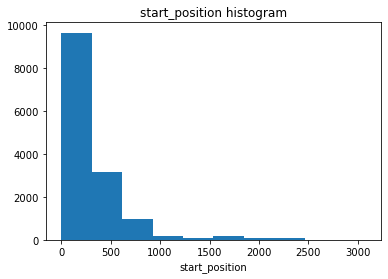

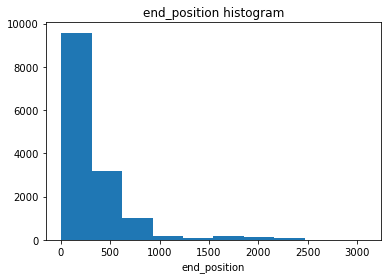

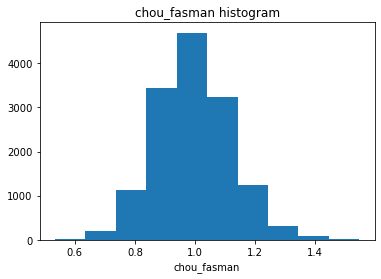

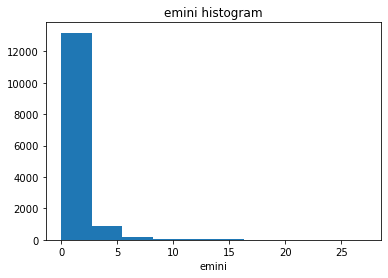

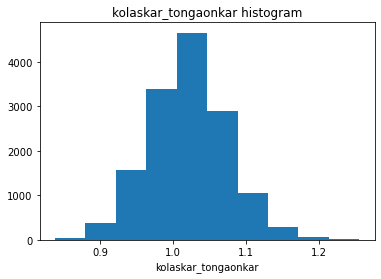

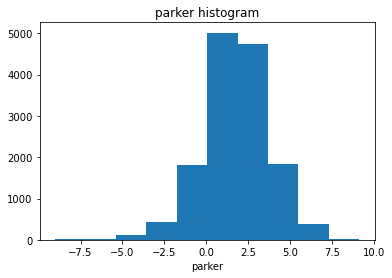

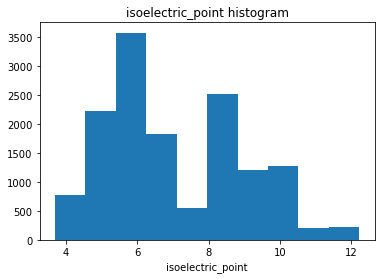

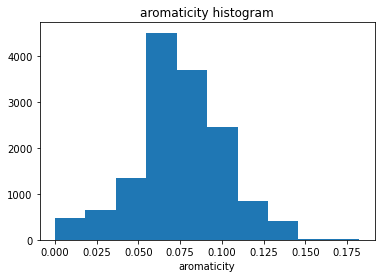

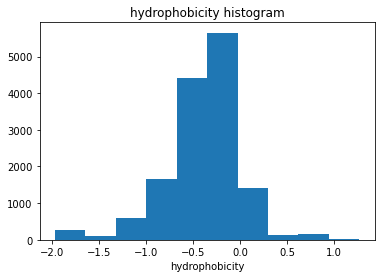

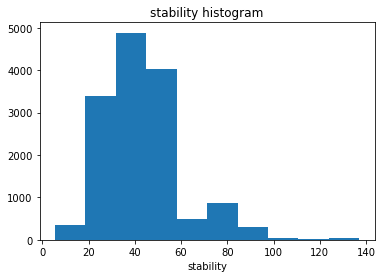

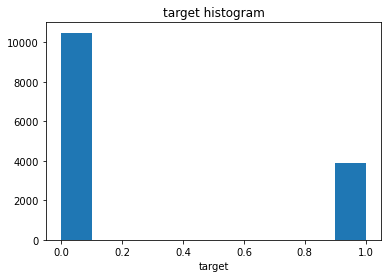

In [9]:
for i in numerical_columns:
    plt.hist(df[f"{i}"])
    plt.title(f"{i} histogram")
    plt.xlabel(f"{i}")
    plt.show()

In [10]:
features = numerical_columns.drop(['target'],axis=1)
target = numerical_columns.target.values.reshape(-1,1)

In [11]:
features

start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
0                 161           165        1.016  0.703                1.018   
1                 251           255        0.770  0.179                1.199   
2                 145           149        0.852  3.427                0.960   
3                 152           156        1.410  2.548                0.936   
4                  85            89        1.214  1.908                0.937   
...               ...           ...          ...    ...                  ...   
14382             177           191        0.910  0.175                1.054   
14383             285           299        0.966  0.216                1.044   
14384             189           203        0.821  0.023                1.044   
14385            1479          1493        1.069  0.239                1.037   
14386            1647          1661        0.962  0.257                1.045   

       parker  isoelectric_point  aromaticity  hydrophobicity  stability  
0       2.220           5.810364     0.103275       -0.143829  40.273300  
1      -3.860           6.210876     0.065476       -0.036905  24.998512  
2       4.280           8.223938     0.091787        0.879227  27.863333  
3       6.320           4.237976     0.044776       -0.521393  30.765373  
4       4.640           6.867493     0.103846       -0.578846  21.684615  
...       ...                ...          ...             ...        ...  
14382   0.820           4.894836     0.071719       -0.701083  46.875237  
14383   1.160           4.894836     0.071719       -0.701083  46.875237  
14384  -1.360           4.894836     0.071719       -0.701083  46.875237  
14385   2.180           9.553040     0.044338       -0.671001  29.494308  
14386   2.127           9.553040     0.044338       -0.671001  29.494308  

[14387 rows x 10 columns]

In [12]:
target

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

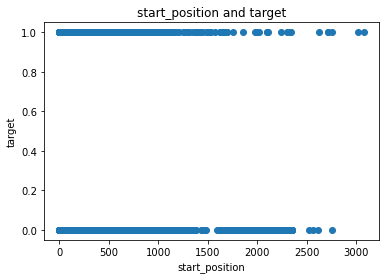

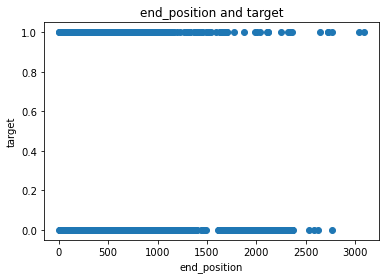

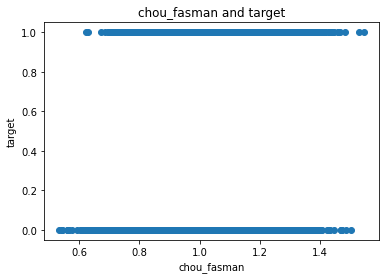

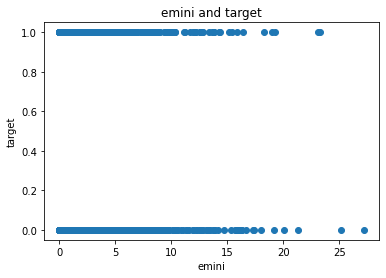

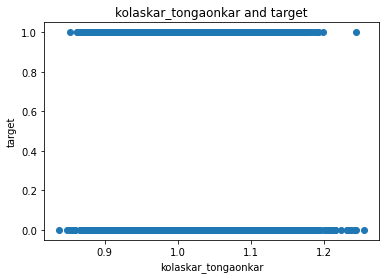

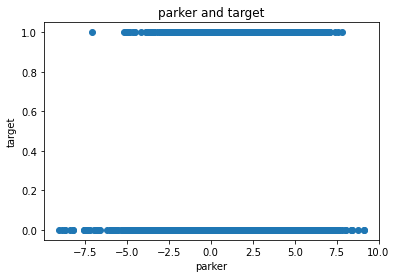

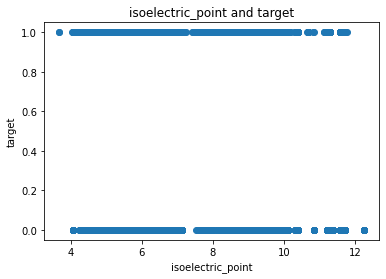

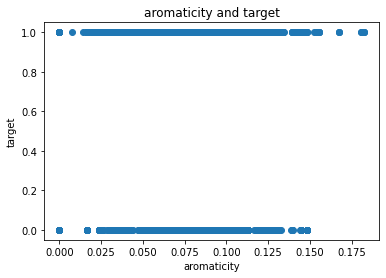

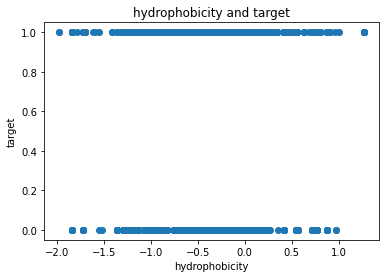

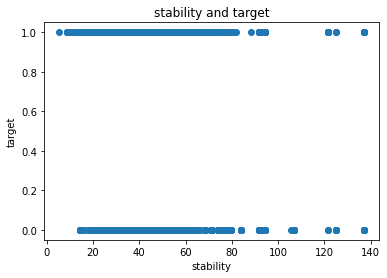

In [13]:
for i in features.columns:
    plt.scatter(df[f"{i}"],target)
    plt.title(f"{i} and target")
    plt.xlabel(f"{i}")
    plt.ylabel("target")
    plt.show()

In [14]:
df

parent_protein_id                                        protein_seq  \
0                A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1                F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2                O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3                O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4                P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   
...                 ...                                                ...   
14382            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14383            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14384            Q91DE1  MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...   
14385            Q9QZS0  MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...   
14386            Q9QZS0  MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...   

       start_position  end_position      peptide_seq  chou_fasman  emini  \
0                 161           165            SASFT        1.016  0.703   
1                 251           255            LCLKI        0.770  0.179   
2                 145           149            AHRET        0.852  3.427   
3                 152           156            SNYDD        1.410  2.548   
4                  85            89            DGTYR        1.214  1.908   
...               ...           ...              ...          ...    ...   
14382             177           191  QVHAEQGLIQYPTAW        0.910  0.175   
14383             285           299  SSLAKHGEYAPFARL        0.966  0.216   
14384             189           203  TAWQSVGHMMVIFRL        0.821  0.023   
14385            1479          1493  KRAHGQDLGTLGSCL        1.069  0.239   
14386            1647          1661  STVKAGDLEKIISRC        0.962  0.257   

       kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                    1.018   2.220           5.810364     0.103275   
1                    1.199  -3.860           6.210876     0.065476   
2                    0.960   4.280           8.223938     0.091787   
3                    0.936   6.320           4.237976     0.044776   
4                    0.937   4.640           6.867493     0.103846   
...                    ...     ...                ...          ...   
14382                1.054   0.820           4.894836     0.071719   
14383                1.044   1.160           4.894836     0.071719   
14384                1.044  -1.360           4.894836     0.071719   
14385                1.037   2.180           9.553040     0.044338   
14386                1.045   2.127           9.553040     0.044338   

       hydrophobicity  stability  target  
0           -0.143829  40.273300       1  
1           -0.036905  24.998512       1  
2            0.879227  27.863333       1  
3           -0.521393  30.765373       1  
4           -0.578846  21.684615       1  
...               ...        ...     ...  
14382       -0.701083  46.875237       0  
14383       -0.701083  46.875237       0  
14384       -0.701083  46.875237       0  
14385       -0.671001  29.494308       0  
14386       -0.671001  29.494308       1  

[14387 rows x 14 columns]

In [15]:
protein_seq = df.protein_seq.values.reshape(-1,1)
pprint(protein_seq)

array([['MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEFQTGGIGNLPIRNWNFNFGLLGTTLLNLDANYVETARNTIDYFVDFVDNVCMDEMVRESQRNGIAPQSDSLRKLSAIKFKRINFDNSSEYIENWNLQNRRQRTGFTFHKPNIFPYSASFTLNRSQPAHDNLMGTMWLNAGSEIQVAGFDYSCAINAPANIQQFEHIVPLRRVLTTATITLLPDAERFSFPRVINSADGATTWFFNPVILRPNNVEVEFLLNGQIINTYQARFGTIVARNFDTIRLSFQLMRPPNMTPAVAVLFPNAQPFEHHATVGLTLRIESAVCESVLADASETLLANVTSVRQEYAIPVGPVFPPGMNWTDLITNYSPSREDNLQRVFTVASIRSMLIK'],
       ['MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLLVYDSAQGKLKDWEVSCDSEYIRLKNVNTGEVREVRVFNFNTEKIYHWGELEIDCVVECSGRFLTKEAVKCHLDAGAQKVLISAPAKDDTKTVVYNVNHTQITSSDNVISGASCTTNALAPIVKIIHRKFGINSGFMTTVHAFTSDQRLQDSPHSDLRRARAAAGSIIPTTTGAAAAIGRVIPELNGKLDGIAHRVPVLTGSLVDLCLKINKSVSAEEINEAIKDGENETLAYVEDPIVSADIIGDTHGSVFDSSLTKVLPTGEVKLYAWYDNESSYVNQLARTLKYYISL'],
       ['MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDELGSKGLWADCVMATGLYHCKPLVDILILPGYVQACRALMIAASVLGLPAILLLLTVLPCIRMGQEPGVAKYRRAQLAGVLLILLALCALVATIWFPVCAHRETTIVSFGYSLYAGWIGAVLCLVGGCVILCCAGDAQAFGENRFYYTAGSSSPTHAKSAHV'],
       ...,
       ['

In [17]:
protein_seq[0]

array(['MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEFQTGGIGNLPIRNWNFNFGLLGTTLLNLDANYVETARNTIDYFVDFVDNVCMDEMVRESQRNGIAPQSDSLRKLSAIKFKRINFDNSSEYIENWNLQNRRQRTGFTFHKPNIFPYSASFTLNRSQPAHDNLMGTMWLNAGSEIQVAGFDYSCAINAPANIQQFEHIVPLRRVLTTATITLLPDAERFSFPRVINSADGATTWFFNPVILRPNNVEVEFLLNGQIINTYQARFGTIVARNFDTIRLSFQLMRPPNMTPAVAVLFPNAQPFEHHATVGLTLRIESAVCESVLADASETLLANVTSVRQEYAIPVGPVFPPGMNWTDLITNYSPSREDNLQRVFTVASIRSMLIK'],
      dtype=object)

In [18]:
for i in range(len(protein_seq)):
    print(protein_seq[i])

['MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEFQTGGIGNLPIRNWNFNFGLLGTTLLNLDANYVETARNTIDYFVDFVDNVCMDEMVRESQRNGIAPQSDSLRKLSAIKFKRINFDNSSEYIENWNLQNRRQRTGFTFHKPNIFPYSASFTLNRSQPAHDNLMGTMWLNAGSEIQVAGFDYSCAINAPANIQQFEHIVPLRRVLTTATITLLPDAERFSFPRVINSADGATTWFFNPVILRPNNVEVEFLLNGQIINTYQARFGTIVARNFDTIRLSFQLMRPPNMTPAVAVLFPNAQPFEHHATVGLTLRIESAVCESVLADASETLLANVTSVRQEYAIPVGPVFPPGMNWTDLITNYSPSREDNLQRVFTVASIRSMLIK']
['MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLLVYDSAQGKLKDWEVSCDSEYIRLKNVNTGEVREVRVFNFNTEKIYHWGELEIDCVVECSGRFLTKEAVKCHLDAGAQKVLISAPAKDDTKTVVYNVNHTQITSSDNVISGASCTTNALAPIVKIIHRKFGINSGFMTTVHAFTSDQRLQDSPHSDLRRARAAAGSIIPTTTGAAAAIGRVIPELNGKLDGIAHRVPVLTGSLVDLCLKINKSVSAEEINEAIKDGENETLAYVEDPIVSADIIGDTHGSVFDSSLTKVLPTGEVKLYAWYDNESSYVNQLARTLKYYISL']
['MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDELGSKGLWADCVMATGLYHCKPLVDILILPGYVQACRALMIAASVLGLPAILLLLTVLPCIRMGQEPGVAKYRRAQLAGVLLILLALCALVATIWFPVCAHRETTIVSFGYSLYAGWIGAVLCLVGGCVILCCAGDAQAFGENRFYYTAGSSSPTHAKSAHV']
['MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVT

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['MFEARLVQGSILKKVLEALKDLINEACWDISSSGVNLQSMDSSHVSLVQLTLRSEGFDTYRCDRNLAMGVNLTSMSKILKCAGNEDIITLRAEDNADTLALVFEAPNQEKVSDYEMKLMDLDVEQLGIPEQEYSCVVKMPSGEFARICRDLSHIGDAVVISCAKDGVKFSASGELGNGNIKLSQTSNVDKEEEAVTIEMNEPVQLTFALRYLNFFTKATPLSSTVTLSMSADVPLVVEYKIADMGHLKYYLAPKIEDEEGS']
['MFEARLVQGSILKKVLEALKDLINEACWDISSSGVNLQSMDSSHVSLVQLTLRSEGFDTYRCDRNLAMGVNLTSMSKILKCAGNEDIITLRAEDNADTLALVFEAPNQEKVSDYEMKLMDLDVEQLGIPEQEYSCVVKMPSGEFARICRDLSHIGDAVVISCAKDGVKFSASGELGNGNIKLSQTSNVDKEEEAVTIEMNEPVQLTFALRYLNFFTKATPLSSTVTLSMSADVPLVVEYKIADMGHLKYYLAPKIEDEEGS']
['MFEARLVQGSILKKVLEALKDLINEACWDISSSGVNLQSMDSSHVSLVQLTLRSEGFDTYRCDRNLAMGVNLTSMSKILKCAGNEDIITLRAEDNADTLALVFEAPNQEKVSDYEMKLMDLDVEQLGIPEQEYSCVVKMPSGEFARICRDLSHIGDAVVISCAKDGVKFSASGELGNGNIKLSQTSNVDKEEEAVTIEMNEPVQLTFALRYLNFFTKATPLSSTVTLSMSADVPLVVEYKIADMGHLKYYLAPKIEDEEGS']
['MFEARLVQGSILKKVLEALKDLINEACWDISSSGVNLQSMDSSHVSLVQLTLRSEGFDTYRCDRNLAMGVNLTSMSKILKCAGNEDIITLRAEDNADTLALVFEAPNQEKVSDYEMKLMDLDVEQLGIPEQEYSCVVKMPSGEFARICRDLSHIGDAVVISCAKDGVKFSASGELGNGNIKLSQTSNVDKEEEAVTIEMN

In [22]:
protein_dict = {
    'A':89,
    'R':174,
    'N':132,
    'D':133,
    'B':133,
    'C':121,
    'Q':146,
    'E':147,
    'Z':147,
    'G':75,
    'H':155,
    'I':131,
    'L':131,
    'K':146,
    'M':149,
    'F':165,
    'P':115,
    'S':105,
    'T':119,
    'W':204,
    'Y':181,
    'V':117
}

In [32]:
print([i for i in protein_seq[0][0]])

['M', 'D', 'V', 'L', 'Y', 'S', 'L', 'S', 'K', 'T', 'L', 'K', 'D', 'A', 'R', 'D', 'K', 'I', 'V', 'E', 'G', 'T', 'L', 'Y', 'S', 'N', 'V', 'S', 'D', 'L', 'I', 'Q', 'Q', 'F', 'N', 'Q', 'M', 'I', 'I', 'T', 'M', 'N', 'G', 'N', 'E', 'F', 'Q', 'T', 'G', 'G', 'I', 'G', 'N', 'L', 'P', 'I', 'R', 'N', 'W', 'N', 'F', 'N', 'F', 'G', 'L', 'L', 'G', 'T', 'T', 'L', 'L', 'N', 'L', 'D', 'A', 'N', 'Y', 'V', 'E', 'T', 'A', 'R', 'N', 'T', 'I', 'D', 'Y', 'F', 'V', 'D', 'F', 'V', 'D', 'N', 'V', 'C', 'M', 'D', 'E', 'M', 'V', 'R', 'E', 'S', 'Q', 'R', 'N', 'G', 'I', 'A', 'P', 'Q', 'S', 'D', 'S', 'L', 'R', 'K', 'L', 'S', 'A', 'I', 'K', 'F', 'K', 'R', 'I', 'N', 'F', 'D', 'N', 'S', 'S', 'E', 'Y', 'I', 'E', 'N', 'W', 'N', 'L', 'Q', 'N', 'R', 'R', 'Q', 'R', 'T', 'G', 'F', 'T', 'F', 'H', 'K', 'P', 'N', 'I', 'F', 'P', 'Y', 'S', 'A', 'S', 'F', 'T', 'L', 'N', 'R', 'S', 'Q', 'P', 'A', 'H', 'D', 'N', 'L', 'M', 'G', 'T', 'M', 'W', 'L', 'N', 'A', 'G', 'S', 'E', 'I', 'Q', 'V', 'A', 'G', 'F', 'D', 'Y', 'S', 'C', 'A', 'I', 'N',

In [38]:
total_mass = 0
for i in [i for i in protein_seq[0][0]]:
    total_mass = total_mass + protein_dict[i]
    
total_mass

51950

In [39]:
for j in protein_seq:
    print(j)

['MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEFQTGGIGNLPIRNWNFNFGLLGTTLLNLDANYVETARNTIDYFVDFVDNVCMDEMVRESQRNGIAPQSDSLRKLSAIKFKRINFDNSSEYIENWNLQNRRQRTGFTFHKPNIFPYSASFTLNRSQPAHDNLMGTMWLNAGSEIQVAGFDYSCAINAPANIQQFEHIVPLRRVLTTATITLLPDAERFSFPRVINSADGATTWFFNPVILRPNNVEVEFLLNGQIINTYQARFGTIVARNFDTIRLSFQLMRPPNMTPAVAVLFPNAQPFEHHATVGLTLRIESAVCESVLADASETLLANVTSVRQEYAIPVGPVFPPGMNWTDLITNYSPSREDNLQRVFTVASIRSMLIK']
['MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLLVYDSAQGKLKDWEVSCDSEYIRLKNVNTGEVREVRVFNFNTEKIYHWGELEIDCVVECSGRFLTKEAVKCHLDAGAQKVLISAPAKDDTKTVVYNVNHTQITSSDNVISGASCTTNALAPIVKIIHRKFGINSGFMTTVHAFTSDQRLQDSPHSDLRRARAAAGSIIPTTTGAAAAIGRVIPELNGKLDGIAHRVPVLTGSLVDLCLKINKSVSAEEINEAIKDGENETLAYVEDPIVSADIIGDTHGSVFDSSLTKVLPTGEVKLYAWYDNESSYVNQLARTLKYYISL']
['MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDELGSKGLWADCVMATGLYHCKPLVDILILPGYVQACRALMIAASVLGLPAILLLLTVLPCIRMGQEPGVAKYRRAQLAGVLLILLALCALVATIWFPVCAHRETTIVSFGYSLYAGWIGAVLCLVGGCVILCCAGDAQAFGENRFYYTAGSSSPTHAKSAHV']
['MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVT

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
for i in range(len(protein_seq)):
    for k in protein_seq[i]:
        print(len(k))

397
336
207
1005
260
260
260
260
260
386
160
15
15
15
13
151
461
461
911
100
98
992
992
497
297
599
194
229
437
398
647
647
647
215
358
488
910
910
910
910
210
210
210
210
424
256
256
357
323
140
140
277
81
83
154
349
979
668
393
1427
530
457
457
457
457
457
457
397
550
397
397
2387
576
574
454
147
1663
267
15
15
15
15
15
15
13
13
14
214
195
461
461
461
461
911
911
911
911
911
911
178
191
582
254
747
317
497
497
2124
404
390
390
390
390
390
477
514
370
370
302
392
647
647
647
647
497
497
1480
1480
1480
1480
1480
1480
358
488
488
429
64
363
363
210
210
369
110
424
424
424
687
471
879
256
256
256
357
359
359
359
359
323
422
422
81
136
79
569
569
299
938
540
368
336
151
151
151
1484
394
393
530
457
457
457
457
457
457
507
507
397
532
266
397
397
397
397
397
336
336
133
507
507
254
83
15
15
15
15
15
13
13
14
166
151
151
267
461
461
461
911
911
911
911
911
911
911
911
911
1128
92
254
254
788
788
115
317
317
111
105
404
404
390
477
437
622
282
159
271
273
647
647
647
647
647
647
424
765
374
